In [3]:
import database
import pandas as pd

# Load the dataframe
df = database.main()

# Display the first few rows of the dataframe
print(df.head())

                     title       company  \
0  Data Analyst internship  PGBPGNGLOBAL   
1  Senior Data Analyst H/F         Qonto   
2             Data Analyst          Jump   
3             Data analyst       Oh BiBi   
4     Product Data Analyst     leboncoin   

                                         description            location  \
0                                                       Paris, France      
1  Les missions du poste\n\nOur mission? Making d...           Anywhere    
2  Pour relever ces défis, nous recrutons un·e Da...    Paris, France      
3  Job Description:\n\nAs a Data Analyst at OhBiB...    Paris, France      
4  The right career for all\n\nCreated in 2006, l...    Paris, France      

                         via  \
0             via PG Careers   
1              via HelloWork   
2  via Welcome To The Jungle   
3                 via Indeed   
4               via LinkedIn   

                                          extensions  \
0                       {"Ful

In [4]:
# Get the summary statistics of the dataframe
print(df.describe())

               title  company  \
count            880      880   
unique           220      232   
top     Data Analyst  Greenly   
freq             115       16   
first            NaN      NaN   
last             NaN      NaN   

                                              description            location  \
count                                                 880                 880   
unique                                                305                  16   
top     Company Description\n\nWhy work for Accor?\n\n...    Paris, France      
freq                                                    7                 729   
first                                                 NaN                 NaN   
last                                                  NaN                 NaN   

                 via             extensions employment_type       work_mode  \
count            880                    880             875              90   
unique            89                    23

C:\Users\karim.HOME\AppData\Local\Temp\ipykernel_15600\3977629830.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe())


In [5]:
# Check the data types of each column
print(df.dtypes)

title                          object
company                        object
description                    object
location                       object
via                            object
extensions                     object
employment_type                object
work_mode                      object
posting_date                   object
degree_requirement             object
salary                         object
posted_at_timestamp    datetime64[ns]
dtype: object


In [11]:
# Check for missing values in the dataframe
print(df.isnull().sum())

title                    0
company                  0
description              0
location                 0
via                      0
extensions               0
employment_type          5
work_mode              790
posting_date           273
degree_requirement     616
salary                 790
posted_at_timestamp    273
dtype: int64


In [12]:
# Calculate duplicates
duplicates = df.duplicated().sum()
print(duplicates)


260


In [15]:
employment_types = df['employment_type'].unique()
print(employment_types)


['Full-time and Internship' 'Full-time' 'Internship' 'Contractor'
 'Full-time and Temp work' 'Full-time, Part-time, and Contractor'
 'Full-time, Temp work, and Internship' 'Part-time and Internship'
 'Temp work and Internship' 'Full-time and Part-time'
 'Full-time and Contractor' None 'Contractor and Temp work' 'Part-time'
 'Part-time and Contractor']


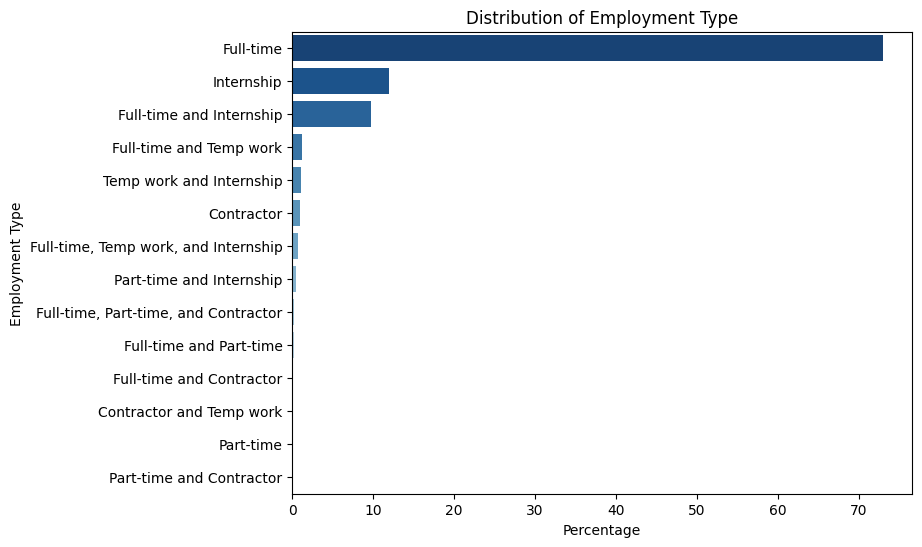

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage distribution of employment_type
employment_type_percentage = df['employment_type'].value_counts(normalize=True) * 100

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=employment_type_percentage.values, y=employment_type_percentage.index, palette="Blues_r")
plt.xlabel('Percentage')
plt.ylabel('Employment Type')
plt.title('Distribution of Employment Type')
plt.show()


In [29]:
degree_required_values = df['degree_requirement'].unique()
print(degree_required_values)


[None 'No degree mentioned']


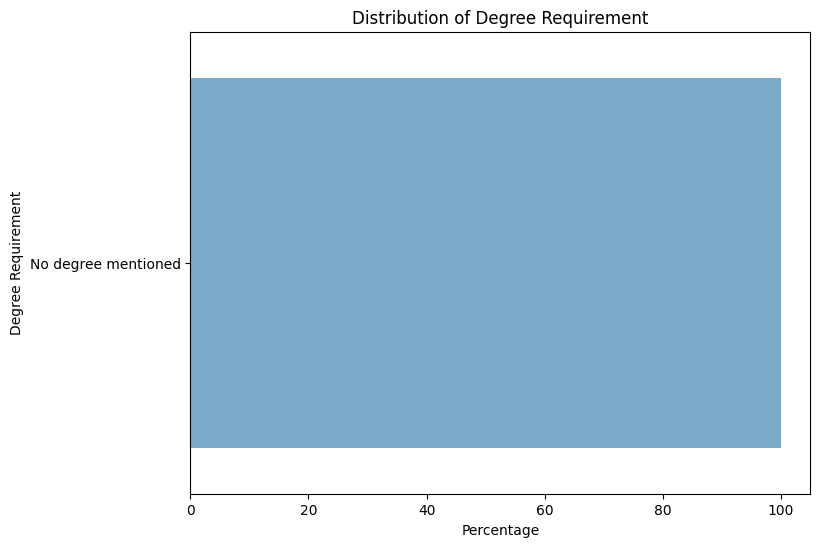

In [30]:
# Calculate the percentage distribution of degree_requirement
degree_requirement_percentage = df['degree_requirement'].value_counts(normalize=True) * 100

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=degree_requirement_percentage.values, y=degree_requirement_percentage.index, palette="Blues_r")
plt.xlabel('Percentage')
plt.ylabel('Degree Requirement')
plt.title('Distribution of Degree Requirement')
plt.show()

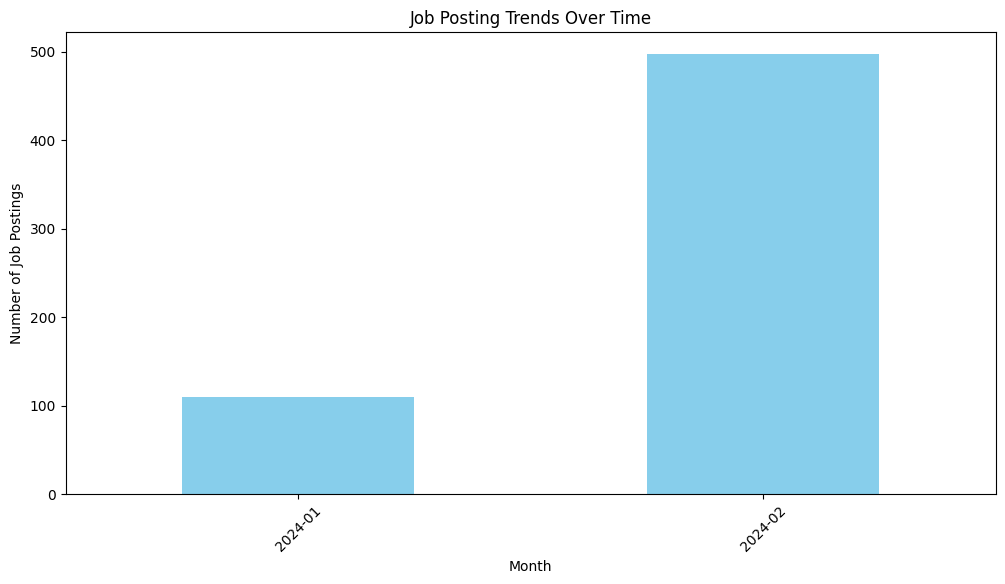

In [34]:
# Trend Analysis Based on Posting Dates
df['posting_month'] = df['posted_at_timestamp'].dt.to_period('M')
posting_trend = df.groupby('posting_month').size()

plt.figure(figsize=(12, 6))
posting_trend.plot(kind='bar', color='skyblue')
plt.title('Job Posting Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.show()